Linear regression models to predict the accuracy of the dataset cardekho

In [1]:
#Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [6]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [7]:
#Find distinct Car names
data.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
i20                           9
innova                        9
ciaz                          9
grand i10                     8
Royal Enfield Classic 350     7
jazz                          7
amaze                         7
sx4                           6
ertiga                        6
eon                           6
i10                           5
swift                         5
alto k10                      5
ritz                          4
wagon r                       4
Bajaj Pulsar 150              4
dzire                         4
etios liva                    4
Royal Enfield Thunder 350     4
Honda CB Hornet 160R          3
etios g                       3
Yamaha FZ S V 2.0             3
creta                         3
Bajaj Avenger 220             3
xcent                         3
                             ..
Hero Hun

In [8]:
# Dropping car name since there are numerous category
data.drop(['Car_Name'],axis=1,inplace = True)

In [9]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [11]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
data['no_year'] = 2020 -data['Year']
data.drop(['Year'],axis=1, inplace=True)

data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


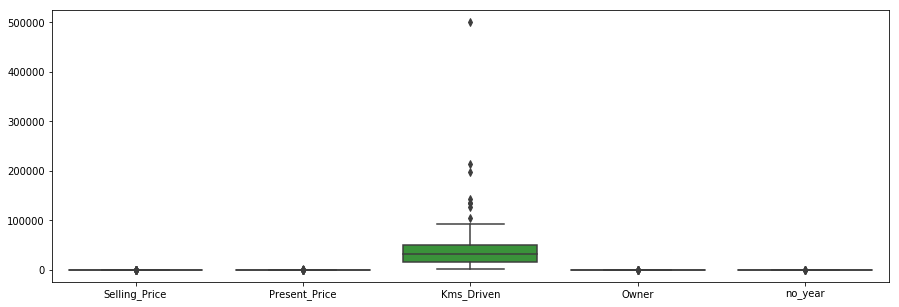

In [14]:
#To find Outliers
plt.figure(figsize = (15,5))
sns.boxplot(data=data)
plt.show()

In [15]:
#Fix outliers in Kms Driven
iqr = data['Kms_Driven'].quantile(0.75)-data['Kms_Driven'].quantile(0.25)

UL = data['Kms_Driven'].quantile(0.75) + (1.5 * iqr)
data[data['Kms_Driven']>UL].count()['Kms_Driven']


8

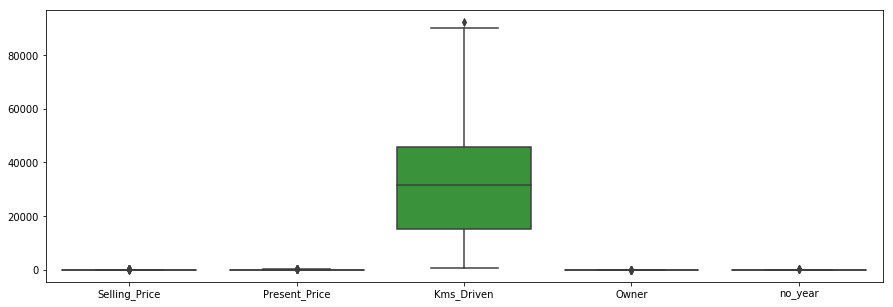

In [16]:
df = data[data['Kms_Driven']<UL]
plt.figure(figsize = (15,5))
sns.boxplot(data=df)
plt.show()

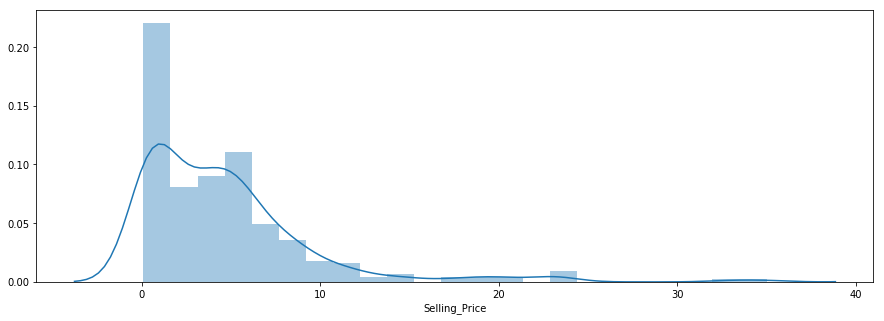

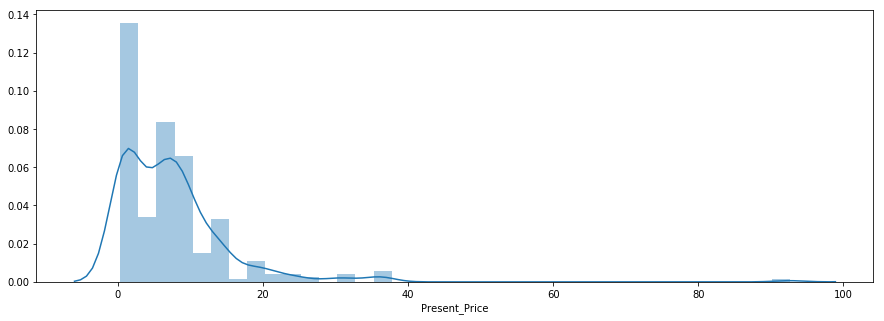

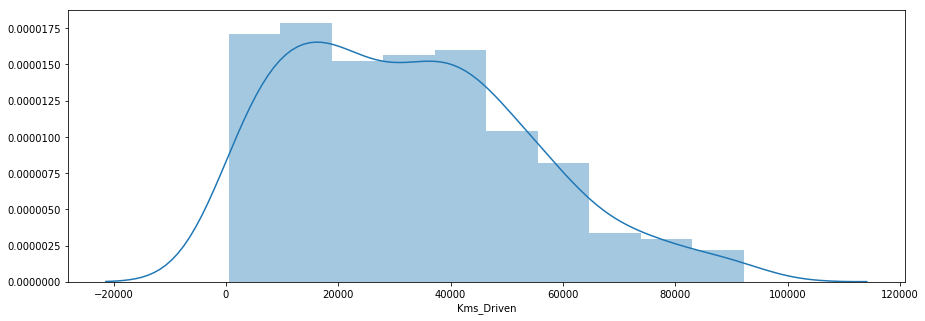

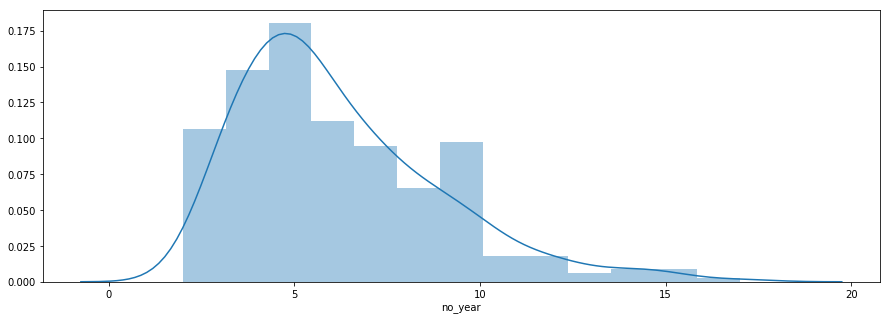

In [17]:
#Check Distibution of the datasets
cols=['Selling_Price', 'Present_Price', 'Kms_Driven',  'no_year']
for column in cols:
    plt.figure(figsize = (15,5))
    sns.distplot(df[column])
    plt.show()

In [18]:
df.skew()

Selling_Price    2.558317
Present_Price    4.377705
Kms_Driven       0.556487
Owner            5.158242
no_year          1.169784
dtype: float64

In [19]:
#Replace categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


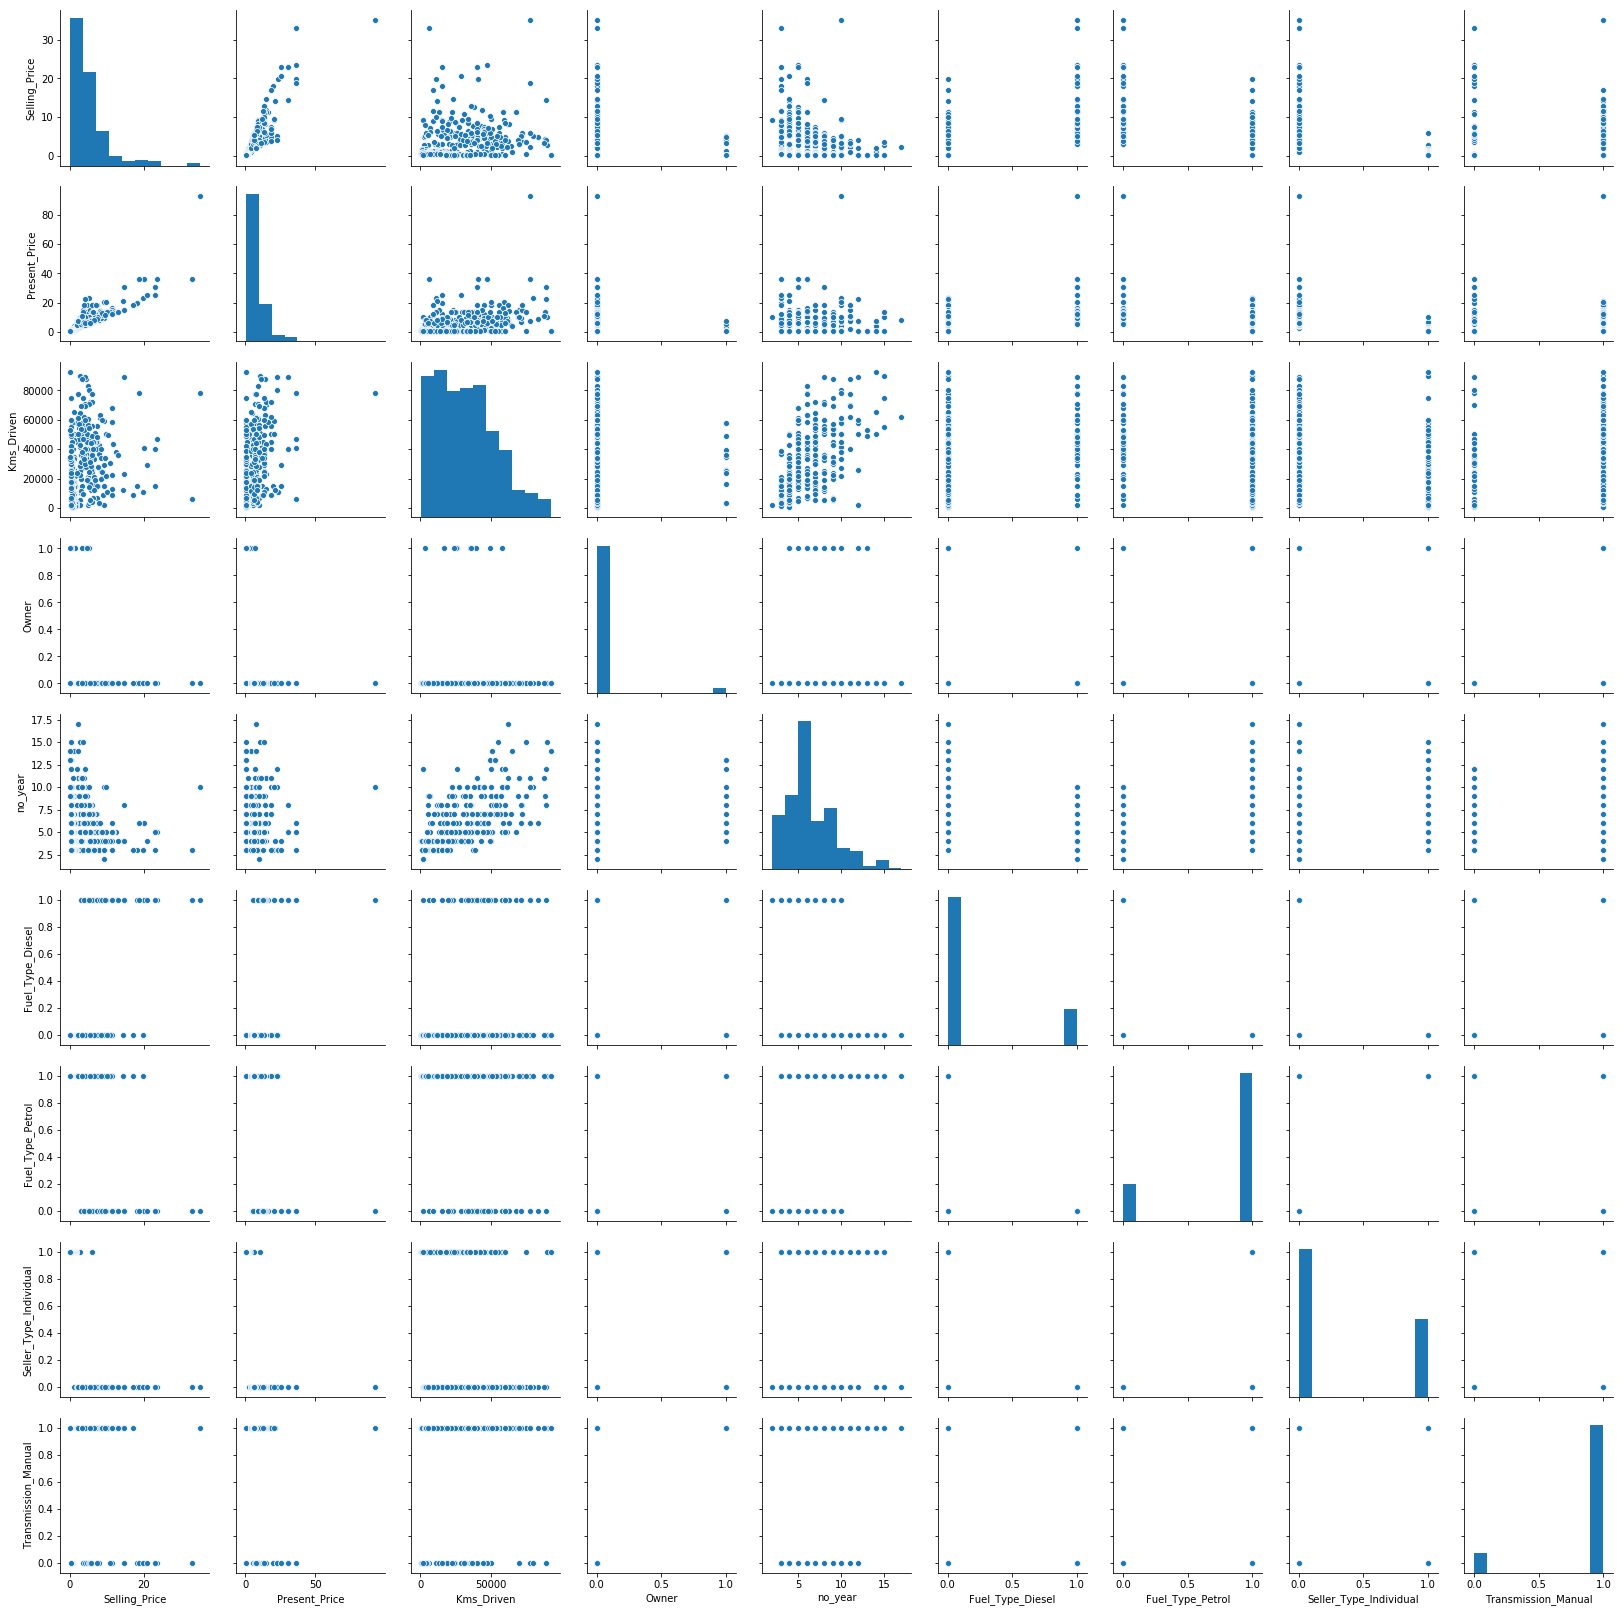

In [20]:
sns.pairplot(df)

In [21]:
#Feature and target split
y = df['Selling_Price']
X = df.drop(['Selling_Price'],axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler 

In [23]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

C:\Users\Bhuvana\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhuvana\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
X

array([[-0.21964343, -0.2641299 , -0.1879779 , ...,  0.50213221,
        -0.7252873 ,  0.36831904],
       [ 0.24791037,  0.48356764, -0.1879779 , ..., -1.99150739,
        -0.7252873 ,  0.36831904],
       [ 0.28460446, -1.20342493, -0.1879779 , ...,  0.50213221,
        -0.7252873 ,  0.36831904],
       ...,
       [ 0.42072772,  2.58338272, -0.1879779 , ...,  0.50213221,
        -0.7252873 ,  0.36831904],
       [ 0.59827979, -1.10528963, -0.1879779 , ..., -1.99150739,
        -0.7252873 ,  0.36831904],
       [-0.18294933, -1.27053078, -0.1879779 , ...,  0.50213221,
        -0.7252873 ,  0.36831904]])

In [25]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 42)

print(X_train.shape)
print(X_test.shape)

(205, 8)
(88, 8)


In [26]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
linearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
#Save Model
import pickle
filename = 'finalized_model.pickle'
pickle.dump(linearReg, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [28]:
y_pred = loaded_model.predict(X_test)

In [29]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.1541731585182016
Mean Squared Error: 2.2823061235097764
Root Mean Squared Error: 1.5107303278579458
r2_score: 0.9127424228344536


In [30]:
linearReg.score(X_train,y_train)

0.8843294236486727

In [31]:

from sklearn.linear_model import RidgeCV,Ridge

alphas = np.random.uniform(low=0, high=10, size=(50,))

ridgecv = RidgeCV(alphas = alphas,normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.2898817867863157

In [32]:
rr = Ridge(alpha = ridgecv.alpha_, normalize = True)
rr.fit(X_train, y_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, rr.predict(X_test)))

Root Mean Squared Error: 1.8804116976638436
r2_score: 0.864812933895968


In [33]:
rr.score(X_train,y_train)

0.8516341854420196

In [34]:
from sklearn.linear_model import LassoCV,Lasso

lassocv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso_reg = Lasso(alpha=lassocv.alpha_)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0030348292324213332, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_reg.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, lasso_reg.predict(X_test)))

Root Mean Squared Error: 1.511627036307216
r2_score: 0.9126388069518813


In [36]:
lasso_reg.score(X_train,y_train)

0.8842973478792509

In [37]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [38]:
cv_model.fit(X_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00172866
Optimal l1_ratio: 0.500
Number of iterations 19


In [39]:
elastic = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.0017286605017026902, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=19, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [40]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, elastic.predict(X_test))))
print('r2_score:', metrics.r2_score(y_test, elastic.predict(X_test)))

Root Mean Squared Error: 1.7463824052268382
r2_score: 0.8833974766466948


In [41]:
elastic.score(X_test, y_test)

0.8833974766466948